# Dependencies and data installation

In [28]:
import pandas as pd
data = pd.read_csv('../data/raw/StudentsPerformance.csv')
df = data.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


analyzing some variables to see how they can be changed

In [30]:
wanted_columns = df.drop(columns = ['gender', 'math score', 'reading score','writing score']).columns.tolist()
for name in wanted_columns:
    print("----------------------\n", df[name].value_counts())

----------------------
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
----------------------
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
----------------------
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64
----------------------
 test preparation course
none         642
completed    358
Name: count, dtype: int64


i'll apply the pandas get_dummies() method to the race/ethnicity, lunch and test_preparation course columns.

and i'll use ordinal codification on the parental level of education to create a hierarchy

In [31]:
df_processed = pd.get_dummies(df, columns=['lunch', 'test preparation course'], drop_first=True)
df_processed = pd.get_dummies(df_processed, columns=['race/ethnicity'] )
df_processed.head()

,gender,parental level of education,math score,reading score,writing score,lunch_standard,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,72,72,74,True,True,False,True,False,False,False
1,female,some college,69,90,88,True,False,False,False,True,False,False
2,female,master's degree,90,95,93,True,True,False,True,False,False,False
3,male,associate's degree,47,57,44,False,True,True,False,False,False,False
4,male,some college,76,78,75,True,True,False,False,True,False,False


In [32]:
mapping = {    
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df_processed['parental level of education'] = df_processed['parental level of education'].map(mapping)
df_processed.head()

,gender,parental level of education,math score,reading score,writing score,lunch_standard,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,4,72,72,74,True,True,False,True,False,False,False
1,female,2,69,90,88,True,False,False,False,True,False,False
2,female,5,90,95,93,True,True,False,True,False,False,False
3,male,3,47,57,44,False,True,True,False,False,False,False
4,male,2,76,78,75,True,True,False,False,True,False,False


Change the gender column to int values, 1 = female; 2 = male

In [33]:
df_processed['gender'] = df_processed['gender'].map({'female': 1, 'male': 0})
df_processed.head()


,gender,parental level of education,math score,reading score,writing score,lunch_standard,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,72,72,74,True,True,False,True,False,False,False
1,1,2,69,90,88,True,False,False,False,True,False,False
2,1,5,90,95,93,True,True,False,True,False,False,False
3,0,3,47,57,44,False,True,True,False,False,False,False
4,0,2,76,78,75,True,True,False,False,True,False,False


saving

In [34]:
df_processed.to_csv('../data/processed/StudentsPerformance_processed.csv', index=False)


# Looking for linear realation between the features and the math score target

seaborn pairplot visualization

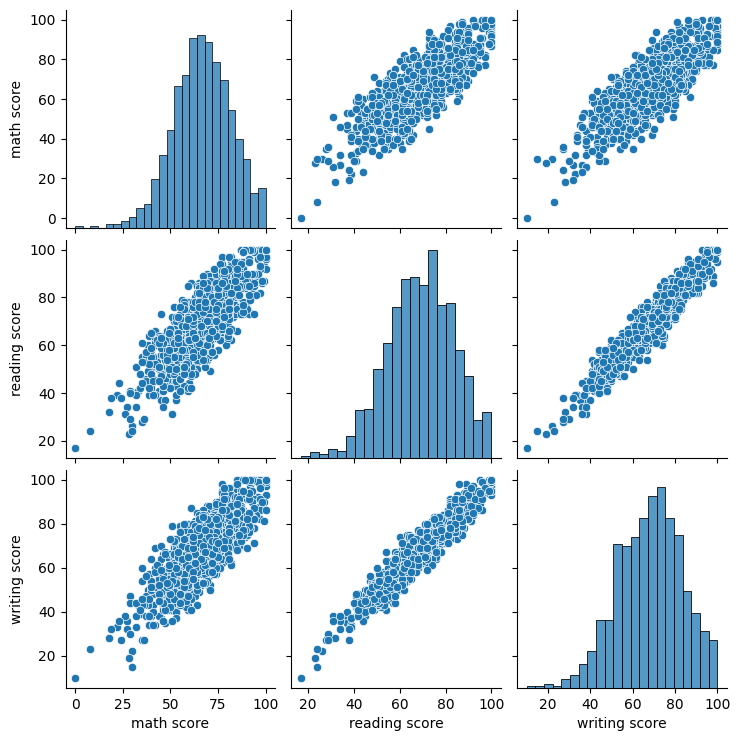

In [35]:
import seaborn as sns
import matplotlib as plt

sns.pairplot(df)